In [7]:
import pickle 
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data_file = "/Users/matthew/Downloads/md_scores.p"

with open(data_file, 'rb') as f: 
    d = pickle.load(f) 

In [9]:
def sum_sse(d): 
    d_new = {"restraints": list()} 
    restraints = d["restraints"]
    
    sse_id = list() 
    i = 0 
    for restraint in restraints: 
        if restraint != "sse": 
            d_new["restraints"].append(restraint) 
        else: 
            sse_id.append(i)
        
        i = i + 1
    
    d_new["restraints"].append("sse")
    steps = list(d.keys())
    steps.remove("restraints")
    
    for step in steps: 
        d_new[step] = list() 
        
        sse_sum = 0 

        for i in range(len(restraints)): 
            if restraints[i] == "sse": 
                sse_sum = sse_sum + d[step][i]
            else: 
                d_new[step].append(d[step][i])

        d_new[step].append(sse_sum)
        
    return d_new

In [10]:
# d = sum_sse(d)

restraints = d["restraints"]

score_dict = dict() 
for restraint in restraints:
    score_dict[restraint] = list() 
    
score_dict["total"] = list() 

# print(restraints)
for key in list(d.keys()): 
    if key != "restraints":
        for i in range(len(d[key])): 
            score_dict[restraints[i]].append(d[key][i])     
        score_dict["total"].append(np.sum(d[key]))
        
    

(-300.0, 2200.0)

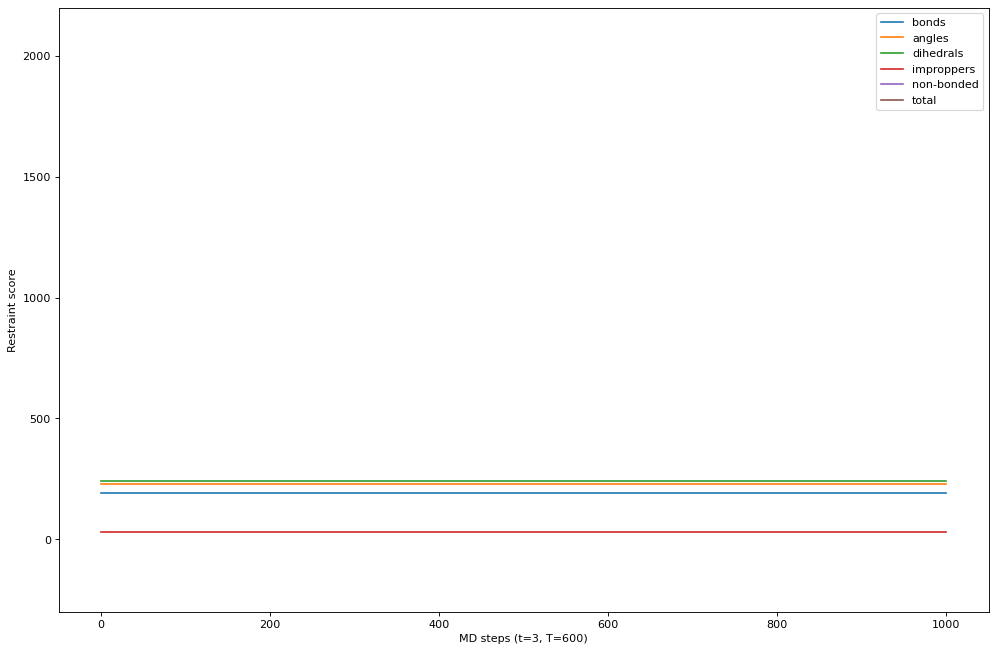

In [11]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel("MD steps (t=3, T=600)")
plt.ylabel("Restraint score")

for restraint in list(score_dict.keys()): 
    plt.plot(range(len(score_dict[restraint])), score_dict[restraint], label=restraint)  

plt.legend(loc="upper right")
plt.ylim(-300,2200)

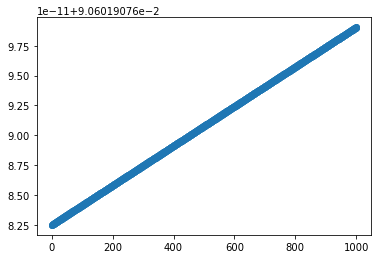

In [12]:
rmsd_file = "/Users/matthew/Downloads/md_rmsd.p"

with open(rmsd_file, 'rb') as f: 
    rmsds = pickle.load(f) 

plt.scatter(list(rmsds.keys()), [rmsds[key] for key in list(rmsds.keys())])